<a href="https://csdms.colorado.edu"><img style="float: center; width: 75%" src="https://raw.githubusercontent.com/csdms/project/main/assets/CSDMS-logo-color-tagline-hor.png"></a>

# <span style="color: green;">Python for Modeling III: Functions - translating our diffusion script into a function</span>

# Functions


In the [diffusion](diffusion.ipynb) notebook,
we wrote code
to solve the one-dimensional diffusion equation numerically,
evolve the solution with time,
and visualize the results.

However, the code in this notebook is long and complicated and frequently repetitive.
What if we wanted to use the code again,
with different parameters or perhaps even in a different notebook?
Cutting and pasting is tedious, and it can easily lead to errors.

We'd like a way to organize our code so that it's easier to reuse.
Python provides for this by letting us define *functions*.
A function groups code into a program that can be called as a unit.


## Where are functions?

- The core Python language has >60 **built-in functions**, such as `print(), input(), len(), float(), int()`

- Here is overview of the core functions https://docs.python.org/3/library/functions.html

- Python comes with a **standard library** that contains numerous **modules** with functions that you can import and use (example: the **math** module)

- There are thousands of third-party modules with useful functions

- You can write your own functions

## The `help()` function

Activates the Python help utility. Examples:

`help()` <= by itself will run the utility until you type "quit"

`help(min)` <= specify name of function you want help with (e.g., `min()`)

Another way to get help on a function is to enter its name followed by a question mark. Example: `pow?`

In [4]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [6]:
pow?

Signature: pow(base, exp, mod=None)
Docstring:
Equivalent to base**exp with 2 arguments or base**exp % mod with 3 arguments

Some types, such as ints, are able to use a more efficient algorithm when
invoked using the three argument form.
Type:      builtin_function_or_method

## Anatomy of a function

A function definition begins with the keyword `def`, followed by the name of the function, followed by a comma-delimited listing of arguments (also known as parameters) in parentheses, and ending with a colon `:`. The code in the body of the function--run when the function is called--must be indented.

```
def function_name(argument1, argument2):
    # statement
    return expression
```
Looking at our hillslope diffusion notebook, we can break down the calculations into several functions. <br/>

So...let's make a function out of part of it. We'll start with setting up our grid space.

In [23]:
def calc_num_nodes(domain_length, grid_spacing):
    num_nodes = domain_length/grid_spacing
    return int(num_nodes)

...which is the same as...

In [24]:
def calc_num_nodes(domain_length, grid_spacing):
    return int(domain_length/grid_spacing)

We've named our function `calc_num_nodes` (naming functions is often an art). It takes two arguments, the total length of our hillslope `domain_length` and the distance between nodes `grid_spacing` we want. The variables `domain_length` and `grid_spacing` are local to the function--they don't exist outside of the body of the function. In the body of the function, the grid spacing, `num_nodes`, is calculated and returned to the caller.

## Execution

Calling a function we define is no different than calling any other Python function. We will call the `calc_num_nodes` function with a `domain_length` of  100 m and `grid_spacing` of 10 m and print the result.

#### To call this function, you can: <br/>
1. Use direct values.

In [5]:
num_nodes_1 = calc_num_nodes(100, 10)

2. Use variables, which you can easily set and change.

In [6]:
l = 100
dx = 10
num_nodes_2 = calc_num_nodes(l, dx)

Note that we passed the arguments to the function in the order it expects: first the domain length, then the grid spacing. 

3. Use the names of the arguments with an `=` to set the values to either variables or values. This makes the function easier to call--you don't have to remember the argument order, you can even change the order, so long as you use the argument name.

In [7]:
num_nodes_3a = calc_num_nodes(domain_length=100, grid_spacing=10)
num_nodes_3b = calc_num_nodes(domain_length=l, grid_spacing=dx)
num_nodes_3c = calc_num_nodes(grid_spacing=dx, domain_length=l)

We can print those to prove that they all do the same thing.

In [8]:
print(f'Comparing output from above: \n1.  Using direct values,      num_nodes = {num_nodes_1} \n2.  Using variables,          num_nodes = {num_nodes_2}\n3a. Using names of arguments, num_nodes = {num_nodes_3a}\n3b.                           num_nodes = {num_nodes_3b}\n3c.                           num_nodes = {num_nodes_3c}')

Comparing output from above: 
1.  Using direct values,      num_nodes = 10 
2.  Using variables,          num_nodes = 10
3a. Using names of arguments, num_nodes = 10
3b.                           num_nodes = 10
3c.                           num_nodes = 10


### By the way: "argument" or "parameter"?

Often used interchangeably.

Technically:

**argument** = the value you pass to the function (an *actual* value, like an *automobile* is an actual thing)

**parameter** = an input quantity expected by a function (a *placeholder* for a real value, like a *parking spot* is to an automobile)

In practice, don't worry about it too much!

# Exercise 1: Create & execute a function to initialize arrays for our x- and y-space. Visualize the results.
Call your function `set_intitial_profile`.

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# insert function here:
def set_initial_profile():


Execute it using:
- grid_spacing = 10
- num_nodes = output of calc_num_nodes
- initial_elevation = 1 m

In [ ]:
# execute it here:



Visualize it.

In [ ]:
# plot output here



#### <span style="color: green;">a version of the correct script is below</span>

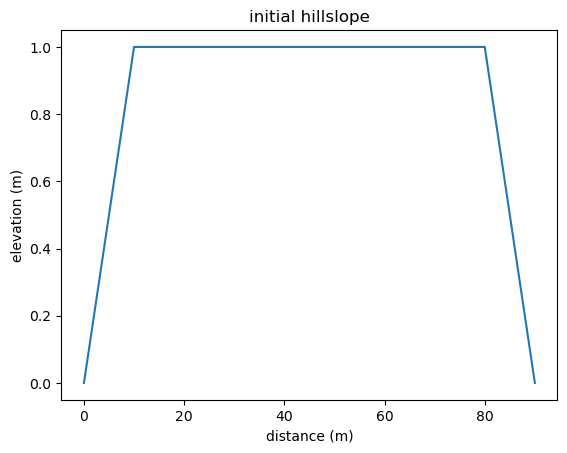

In [9]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# define function
def set_initial_profile(grid_spacing, num_nodes, initial_elevation):
    x = np.arange(0, grid_spacing * num_nodes, grid_spacing)
    z = np.zeros(num_nodes)
    z[1:num_nodes-1] = initial_elevation
    return x, z

# execute function
x, z = set_initial_profile(10, num_nodes_1, 1.0)

# plot output
plt.plot(x,z)
plt.title("initial hillslope")
plt.xlabel("distance (m)")
plt.ylabel("elevation (m)")
plt.show()


# Additional features of functions

Python functions have many interesting features, more than we can address here. We'll focus on a few, and provide a list of additional resources in the summary.

### Default arguments

It's often useful to define default values for the arguments in a function.

Let's edit our `calc_num_nodes` function to set a default length of our domain.

In [10]:
def calc_num_nodes(domain_length, grid_spacing=10):
    return int(domain_length/grid_spacing)

Now, if we omit the argument `domain_length`, its default value is used instead.

For example:

In [11]:
num_nodes = calc_num_nodes(50)
# gives us...
print(f'4. num_nodes = {num_nodes} ')

4. num_nodes = 5 


NOTE: If we had set a default value for `domain_length`, but not `grid_spacing`, we'd get an error...

In [10]:
#def calc_num_nodes(domain_length=100, grid_spacing):
#    return int(domain_length/grid_spacing)

SyntaxError: non-default argument follows default argument (748846508.py, line 1)

This is because, you must put all non-default arguments **BEFORE** default arguments.

### Documentation

Let's work with a version of the one-dimensional diffusion equation. This might slightly differ from what you created above, but that's okay.

In our function `set_intial_profile`, one of the arguments, `num_nodes` needs to be an integer. This is why previously, when creating our `calc_num_nodes` we used the `int()` function for our output. However, you cannot know that just by looking at the arguments line. 

This is where documentation can help. 

The first statement of the body of a function can optionally hold the function's documentation string, or docstring. It's used to describe the function's purpose, its arguments, and its return value.

Add a docstring to `set_initial_profile`.

In [12]:
def set_initial_profile(dx, num_nodes, initial_elevation = 1.0):
    """
    Set the initial elevation profile for a diffusion simulation.

    Parameters
    ----------
    grid_spacing : float
        The spacing between grid points in the simulation.
    num_nodes : int
        The number of grid points in the simulation.
    initial_elevation : float
        The initial elevation value for the grid points. Default is 1.0 m.
    
    Returns
    -------
    tuple
        A tuple containing (x, z) where:
        - x (numpy.ndarray): Array of x-coordinates with shape (num_nodes,)
        - z (numpy.ndarray): Array of elevation values with shape (num_nodes,)
    """
    x = np.arange(0, dx * num_nodes, dx)
    z = np.zeros(num_nodes)
    z[1:num_nodes-1] = initial_elevation
    return z, x

When a function has a docstring, you can use the help function or the questions mark ? to display it in a Python session or in a notebook.

In [ ]:
help(set_initial_profile)

In [ ]:
set_initial_profile?

In a notebook, you can also select the Shift + Tab keys to view the docstring.

In [ ]:
# After you've created the function solve1d, place the cursor in the line below and select the `Shift` + `Tab` keys.
set_initial_profile

Docstring aren't necessary, but they're helpful because they provide information about a function.

Documentation systems such as [Sphinx](https://www.sphinx-doc.org/en/master/) use docstrings to produce formatted documentation. [NumPy](https://numpy.org/doc/1.20/docs/howto_document.html#docstrings) and [Google](https://google.github.io/styleguide/pyguide.html#s3.8.1-comments-in-doc-strings) have style guidelines for docstrings. It's a good practice to pick a style and use it consistently.

# Exercise 2: Creating a hillslope diffusion function.

This morning, you created a script that solved hillslope diffusion. And just now, you created two functions, one to calculate the number of nodes in a domain, `calc_num_nodes`, and one to set up the initial hillslope profile, `set_initial_profile`. We already showed you an example of how to use the output of one function as an input for another function. Now you are going to create 5 new functions and then use them and the two existing functions to simulate diffusion of a hillslope.<br/>

- `plot_elevation`
- `lower_elevation`
- `calc_flux`
- `calc_rate_of_change`
- `update_elevation`

As a starting point, we've written a code that executes these 6 functions, providing parameter values and arguments for the 5 new functions.

It might help to create pseudocode first, following the script you made in this morning's lesson. Don't forget to add documentation.


Code that you will eventually execute:<br/>
    
    #Part 1: Set parameters and plot initial profile.
    timesteps = 5           # how many timesteps to run
    dt = 10                 # length of timestep (yr)
    domain_length = 100     # length of domain (m)
    dx = 10                 # distance between nodes (m)
    initial_elev = 5        # elevation at internal nodes (m)
    diffusion_coeff = 1e-02 # diffusion coefficient (m2/yr)
    incision_rate 0.0001    # m/yr
    
    num_nodes = calc_num_nodes(domain_length, dx) + 1  # +1 to include endpoint
    elevation, x = set_initial_profile(dx, num_nodes, initial_elev)
    plot_elevation(elevation, x)

    # Part 2: Execute hillslope diffusion.
    for i in range(timesteps):
        elevation = lower_elevation(elevation, incision_rate, dt)
        soil_flux = calc_flux(elevation, diffusion_coeff, dx)
        elev_rate_of_change = calc_rate_of_change(soil_flux, dx)
        elevation = update_elevation(elev_rate_of_change, elevation, dt)
    
    plot_elevation(elevation, x)

In [ ]:
# write new function that plots elevation
def plot_elevation(elevation, x):

In [ ]:
# write a function that lowers elevation
def lower_elevation():

In [ ]:
# write a new function that calculates the soil flux
def soil_flux():

In [ ]:
# write a new function that calculates the rate of change in elevation
def calc_rate_of_change():

In [ ]:
# write a new function that updates the elevation array
def update_elevation():

Part 1: Set parameters and plot initial profile.

In [ ]:
timesteps = 5           # how many timesteps to run
dt = 10                 # length of timestep (yr)
domain_length = 10      # length of domain (m)
dx = 1                  # distance between nodes (m)
initial_elev = 5        # elevation at internal nodes (m)
diffusion_coeff = 1e-02 # diffusion coefficient (m2/yr)
incision_rate = 0.001   # m/yr

num_nodes = calc_num_nodes(domain_length, dx) + 1  # +1 to include endpoint
elevation, x = set_initial_profile(dx, num_nodes, initial_elev)
plot_elevation(elevation, x)

Part 2: Execute hillslope diffusion!

In [ ]:
for i in range(timesteps):
    elevation = lower_elevation(elevation, incision_rate, dt)
    soil_flux = calc_flux(elevation, diffusion_coeff, dx)
    elev_rate_of_change = calc_rate_of_change(soil_flux, dx)
    elevation = update_elevation(elev_rate_of_change, elevation, dt)

plot_elevation(elevation, x)

#### <span style="color: green;">a version of the correct script is below</span>

In [31]:
# write new function that plots elevation
def plot_elevation(elevation, x):
    """
    Plots elevation over some distance, can use outputs from 'set_initial_profile' function.
    
    Parameters
    ----------
    elevation : array-like
        The elevation values in m.
    x : array-like
        The x-coordinates in m.
    
    Returns
    -------
    Plot, nothing saved.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x, elevation, 'bo-')
    plt.xlabel('Distance (m)')
    plt.ylabel('Elevation (m)')
    plt.title('Hillslope Elevation')
    plt.grid(True)
    plt.show()

In [14]:
# write a function that lowers elevation
def lower_elevation(elevation, incision_rate, dt):
    """
    Lowers the elevation of the first and last nodes in an array.
    
    Parameters:
    -----------
    elevation : array-like
        The elevation values in m; can use the output from 'set_initial_profile'.
    incision_rate : float
        The rate at which to lower the elevation in m/yr.
    dt : float
        The time step in years

    Returns:
    --------
    elevation : array-like
        The updated elevation values in m.    
    """
    drop_per_step = incision_rate * dt
    elevation[0] -= drop_per_step
    elevation[-1] -= drop_per_step
    return elevation

In [25]:
# write a new function that calculates the soil flux
def calc_flux(elevation, diffusion_coeff, dx):
    """
    Calculate the soil flux based on the elevation gradient.

    Parameters
    ----------
    elevation : array-like
        The elevation values in m; can use the output from 'set_initial_profile'.
    diffusion_coeff : float
        The diffusion coefficient in m^2/yr.
    dx : float
        The grid spacing in m.

    Returns
    -------
    numpy.ndarray
        The soil flux values in m^2/yr.
    """
    return -diffusion_coeff * np.diff(elevation) / dx

In [16]:
# write a new function that calculates the rate of change in elevation
def calc_rate_of_change(soil_flux, dx):
    """
    Calculate the rate of change in elevation based on the soil flux.
    
    Parameters
    ----------
    soil_flux : array-like
        The soil flux values in m^2/yr. Using output from 'calc_flux'.
    dx : float
        The grid spacing in m.

    Returns
    -------
    numpy.ndarray
        The rate of change in elevation in m/yr.

    """
    return np.diff(soil_flux) / dx

In [17]:
# write a new function that updates the elevation array
def update_elevation(elev_rate_of_change, elevation, dt):
    """
    Update the elevation array based on the rate of change and time step.
    
    Parameters
    ----------
    elev_rate_of_change : array-like
        The rate of change in elevation in m/yr. Using output from 'calc_rate_of_change'.
    elevation : array-like
        The elevation values in m; can use the output from 'set_initial_profile'.
    dt : float
        The time step in years.
        
    Returns
    -------
    numpy.ndarray
        The updated elevation values in m.
    """
    elevation[1:-1] -= dt * elev_rate_of_change
    return elevation

Set Parameters and plot intial profile

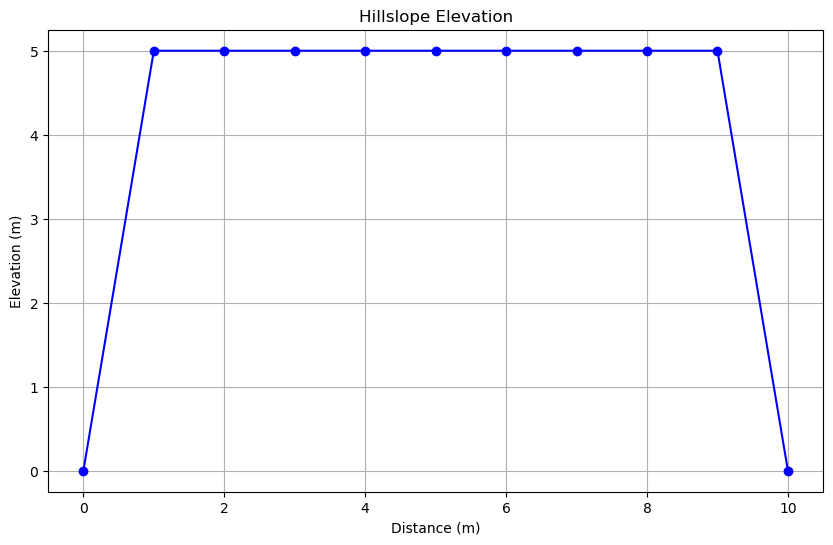

In [33]:
timesteps = 5           # how many timesteps to run
dt = 10                 # length of timestep (yr)
domain_length = 10      # length of domain (m)
dx = 1                  # distance between nodes (m)
initial_elev = 5        # elevation at internal nodes (m)
diffusion_coeff = 1e-02 # diffusion coefficient (m2/yr)
incision_rate = 0.001   # m/yr

num_nodes = calc_num_nodes(domain_length, dx) + 1  # +1 to include endpoint
elevation, x = set_initial_profile(dx, num_nodes, initial_elev)
plot_elevation(elevation, x)

Evolve hillslope using diffusion!

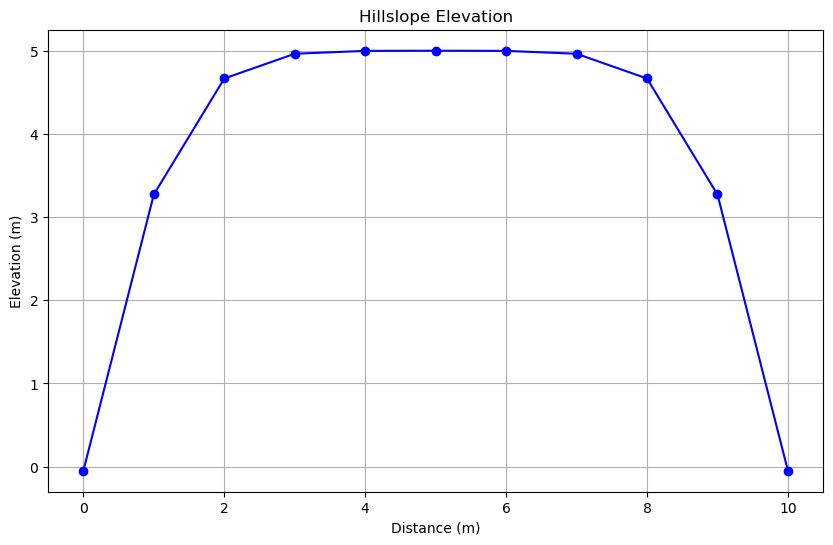

In [35]:
for i in range(timesteps):
    elevation = lower_elevation(elevation, incision_rate, dt)
    soil_flux = calc_flux(elevation, diffusion_coeff, dx)
    elev_rate_of_change = calc_rate_of_change(soil_flux, dx)
    elevation = update_elevation(elev_rate_of_change, elevation, dt)

plot_elevation(elevation, x)

# Exercise 3: exploring influence of different parameters.

1. Change the lowering rate by an order of magnitude. How does this affect the slope of our hillslope?
2. Change the diffusion coefficient by an order of magnitude. How does this affect the slope of our hillslope?

**EXTRA CHALLENGE**: Change the domain such that the left half has one diffusion coefficient and the right half has a different diffusion coefficient. How does this effeect the cross section?

**NOTE**: Don't forget to import relevant libraries before you use your functions (i.e., NumPy)...

This is a first taste of how programs can be built to solve a problem: break the problem into smaller pieces, write functions to address the smaller pieces, then assemble the functions to solve the problem.

In [ ]:
# extra space if you need it





# Summary

The process of building larger programs from smaller functions is a key element of scientific programming.

Information from the Python documentation, including the sections [Defining Functions](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) and [More on Defining Functions](https://docs.python.org/3/tutorial/controlflow.html#more-on-defining-functions) was used heavily in creating this notebook. There's a lot more there, including many features of functions we didn't cover.

## Topics not covered

These are a few topics that we didn't cover in this lesson, but they're important enough that we probably should have.

- formal versus actual parameters
- the concept of scope
- local versus global variables
- use of type hints

More information on these topics can be found in the Python documentation.

## Last thoughts

If your function doesn't fit on a screen, it's too long. Break it up into smaller functions.

How do we know a function is working as expected? This is partially answered with unit testing, covered later.

# Some other useful things about functions

### Functions with an arbitrary number of arguments

Some functions are set up to accept any number of arguments, separated by commas.

Example: `print()` takes as many arguments as you give it:

```
print("I", "can", "has", "cheese")
```

### Passing arguments as a list

When you have a function like `print()` that takes multiple arguments, it's possible to pass arguments as a list preceded by the `*` operator.

Example:
```
epochs = ["Paleocene", "Eocene", "Oligocene", "Miocene", "Pliocene", "Pleistocene"]
print(*epochs)
```

Try this with another function.

### Passing keyword arguments as a dict

Sometimes it can be useful to manage keyword arguments using a dictionary. The keys should be the argument keywords, and the values should be the corresponding values for those arguments. Putting `**` before the name of the dictionary tells Python to interpret the dictionary as a set of keyword arguments.

Example:
```
mydict = {"base": 10.0, "exp": 2.0}
print(pow(**mydict))
```

Try this with another function.

## Catch function output

Often, the job of a function is to **return** one or more values as the output of its operation. Examples:

- `len()` returns the length of an object, as an integer
- `round()` returns the rounded value, as a float

You can **catch** a function return using the assignment operator and a variable(s). Examples:

- `num_letters = len("hello")`
- `rounded_pi = round(3.1415926, 2)`

The variable will contain the value(s) returned by the function.

### Will `None` come forward?

Even if a function does not produce a useful output, it will still return a special Python constant called `None`, which is of type `NoneType`.

Example:
```
result = print("Nothing to see here...")
print(result)
print(type(result))
```

### Multiple returns

Functions can return more than one value. When a function returns multiple values, the values are returned together as a **tuple**. This is a data type unique to python. The individual values of a tuple can be accessed by indexing.

Example: the function `divmod(a, b)` returns the integer quotient and remainder when `a` is divided by `b`.

```
result = divmod(13, 5)
print(result)
print(type(result))
quotient = result[0]
remainder = result[1]
print(quotient, remainder)
```

In [ ]:
result = divmod(13, 5)
print(result)
print(type(result))
quotient = result[0]
remainder = result[1]
print(quotient, remainder)

### Required versus optional arguments

Some functions require one or more arguments, and will trigger an error if you don't provide the correct number of arguments.

Example: `len()` requires exactly one argument:

```
len()
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[15], line 1
----> 1 len()

TypeError: len() takes exactly one argument (0 given)
```

### Positional arguments

When a function takes more than one argument, the different arguments can be specified according to their position.

Example: `pow()` has two required arguments, `base` and `exp`.

Compare the difference between `pow(10, 2)` and `pow(2, 10)`.

### Keyword arguments

Arguments can be specified according to their names, as **keyword arguments**.

Example: what does `pow(exp=2, base=10)` return?

Example: what happens if you run `print("spam", "and", "eggs", sep="!")`?

In [ ]:
pow(exp=2,base=10)
help(pow)

### Required versus optional arguments

Some arguments are **optional**. If the argument is not given, a default value will be used.

Example: the `round()` function has an optional `ndigits` argument (the default is to round to the nearest whole number)

```
print(round(3.1415926))
print(round(3.1415926, 2))
print(round(3.1415926, ndigits=2))
```